<table align="center" width=100%>
        <td>
            <div align="right">
                <font color="#21618C" size=6px>
                    <b>LOAN DATASET - CASE STUDY
                    </b>  
                </font>
            </div>
        </td>

## Problem Statement:
In this Case study we need to use Loans dataset with the aim to identify variables which indicate if a person is likely to default.With the Exploratory Data Analysis here, we have to identify the risky loan applicants to avoid any financial loss to the company.


## DataSet Description :
It contains the complete loan data for all loans issued through the time period 2007 to 2011.

## Data Dictionary :
* **annual_inc** - The self-reported annual income provided by the borrower during registration.
* **dti** - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan,divided by the borrower’s self-reported monthly income.
* **emp_length** -Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* **funded_amnt** - The total amount committed to that loan at that point in time.
* **funded_amnt_inv** -The total amount committed by investors for that loan at that point in time.
* **grade** - LC assigned loan grade
* **id** - A unique LC assigned ID for the loan listing.
* **installment** - The monthly payment owed by the borrower if the loan originates.
* **int_rate** - Interest Rate on the loan
* **last_pymnt_amnt**-Last total payment amount received
* **last_pymnt_d** -Last month payment was received
* **loan_amnt** -The listed amount of the loan applied for by the borrower. If atsome point in time, the credit departmentreduces the loan amount, then it will be reflected in this value.
* **loan_status** - Current status of the loan
* **member_id** -A unique LC assigned Id for the borrower member.
* **purpose** - A category provided by the borrower for the loan request.
* **term** -The number of payments on the loan. Values are in months and can be either 36 or 60.
* **total_acc** -The total number of credit lines currently in the borrower's credit file
* **total_pymnt** -Payments received to date for total amount funded
* **total_pymnt_inv** -Payments received to date for portion of total amount funded by investors
* **total_rec_int** -Interest received to date

## Understanding the data

### Import the libraries

In [12]:
# Import the required libraries
import numpy as np                  # Import numpy library to perform mathematical functions
import pandas as pd                 # Import pandas to perform operations on dataset
import matplotlib.pyplot as plt     # Import matplotlib for visualization tools
import seaborn as sns               # Import seaborn for advanced visualization tools
import warnings                     # Import warnings library 
warnings.filterwarnings('ignore')   # Ignore warnings during code execution

In [18]:
#Importing the data file
df = pd.read_csv("loan.csv")

#To understand the data extract the first five rows using head function
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


In [19]:
print("Number of rows:", df.shape[0])    # no of rows
print("Number of columns:", df.shape[1]) # no of columns

Number of rows: 39717
Number of columns: 23


In [20]:
# To display the type of data in each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

## Data Cleaning

In [21]:
#Removing the columns having complete NaN value in the entire dataset
df.drop(["Unnamed: 21","Unnamed: 22"],axis=1,inplace=True)
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66


In [22]:
#Checking null values in pending columns
df.isnull().sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1075
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
last_pymnt_d             71
last_pymnt_amnt           0
dtype: int64

#### Conversion of character type into float type

In [23]:
#‘Int_rate’ column is character type. With the help of lambda function convert into float type.
df['int_rate']= df["int_rate"].apply(lambda x : float(x.strip("%")))
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

#### Converting emp_length column that was in string to float datatype

In [24]:
#Converting emp_length column that was in string to float datatype 
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)
df["emp_length"]

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

Since , the mean and median line are close to each other we can use mean to impute the null values.

#### Imputing the null values

In [25]:
#Impute null values in emp_length column with mean value
df.emp_length.fillna(df.emp_length.mean(),inplace=True)

#Impute null values in last_pymnt_d column with mode value
df.last_pymnt_d.fillna(df.last_pymnt_d.mode().values[0],inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10.0,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,1.0,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10.0,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10.0,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1.0,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


In [26]:
#Checking pending null values
df.isnull().sum().sum()

0

#### Find the value counts of the ‘loan_status’

In [50]:
# count of each status in loan_status column
df["loan_status"].value_counts() 

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Filter only the ‘fully paid’ and ‘charged off’ categories

In [51]:
# Filter out fully paid and charged off categories
d=df[df["loan_status"] != "Current"] 

#### After filtering fully paid’ and ‘charged off’ categories

In [52]:
# count of each status in loan_status column after removing current value
d["loan_status"].value_counts() 

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

#### Removing the month from the ‘term’ column

In [27]:
# Remove month from term column using lambda function such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively
df["term"]=df["term"].apply(lambda x: int(x.strip(' ')[0:2])) 
df["term"]

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

#### Create a new column as risky_loan_applicant by comparing loan_amnt and funded_amnt
#### If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as ‘1’

In [31]:
#setting loan amount to 0 if it is less than funded_amnt using lambda function
df["risky_loan_applicant"] = df.apply(lambda x : 0 if x["loan_amnt"] <= x["funded_amnt"] else 1,axis=1) 
df["risky_loan_applicant"].value_counts()

0    37868
1     1849
Name: risky_loan_applicant, dtype: int64

#### Barplot: loan_status vs grade

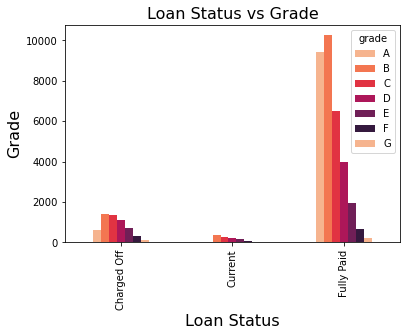

In [56]:
# plot bar plot using loan status vs grade 
color = sns.set_palette('rocket_r')
stack = pd.crosstab(df['loan_status'],df['grade'])
stack.plot.bar(color)
plt.title("Loan Status vs Grade", fontsize = 16)
plt.xlabel('Loan Status', fontsize = 16)
plt.ylabel('Grade', fontsize = 16)
plt.show()

The plot highlights that the majority of individuals across different loan statuses belong to grade B. This suggests that people in grade B are at a relatively lower risk level. Grades are assigned based on credit scores, with grade A representing the lowest expected risk and grade G indicating the highest expected risk. Given this, it is essential to exercise caution and carefully evaluate loan applications from individuals in grade G to minimize potential risks.

#### Barplot: loan_status vs term

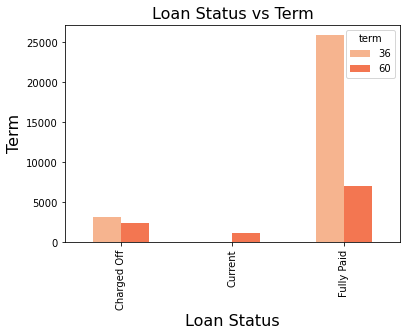

In [53]:
#plot bar plot using loan status vs term
color = sns.set_palette('rocket_r')
stack = pd.crosstab(df['loan_status'],df['term'])
stack.plot.bar(color)
plt.title("Loan Status vs Term", fontsize = 16)
plt.xlabel('Loan Status', fontsize = 16)
plt.ylabel('Term', fontsize = 16)
plt.show()

The plot illustrates that most fully paid and charged off loan statuses are associated with a 36-month term duration, while current loan statuses are exclusively for 60-month terms. With fewer charged off cases compared to fully paid, it suggests that around 20% of individuals pose a higher risk.

#### Barplot: loan_status vs verification_status

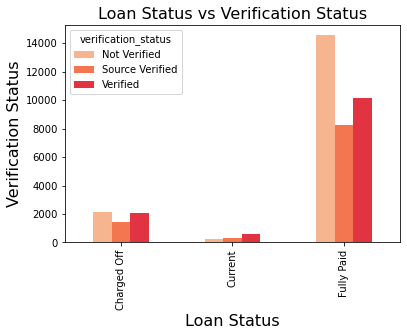

In [54]:
#plot bar plot using loan status vs verification status
color = sns.set_palette('rocket_r')
stack = pd.crosstab(df['loan_status'],df['verification_status'])
stack.plot.bar(color)
plt.title("Loan Status vs Verification Status", fontsize = 16)
plt.xlabel('Loan Status', fontsize = 16)
plt.ylabel('Verification Status', fontsize = 16)
plt.show()

* The graph reveals that the count of individuals in the "charged off" status is roughly equal between those who have verified and those who have not verified their loan status. 
* However, a noteworthy observation is that a substantial number of individuals have successfully paid off their loans. Interestingly, the number of people who have gone through source verification is lower compared to those who have not.

#### Converting the ‘emp_len’ column into categorical column

In [35]:
# defining a function
def fun(x): 
    if x <= 1:
        return "Fresher"
    elif x > 1 and x < 3:
        return "Junior"
    elif x > 3 and x < 7:
        return "Senior"
    else:
        return "Expert"
    
# applying user defined function in emp_length table   
df["emp_length"] = df["emp_length"].apply(fun)
df["emp_length"]

0         Expert
1        Fresher
2         Expert
3         Expert
4        Fresher
          ...   
39712     Senior
39713     Expert
39714    Fresher
39715    Fresher
39716    Fresher
Name: emp_length, Length: 39717, dtype: object

#### Display the distribution of ‘loan_amnt’

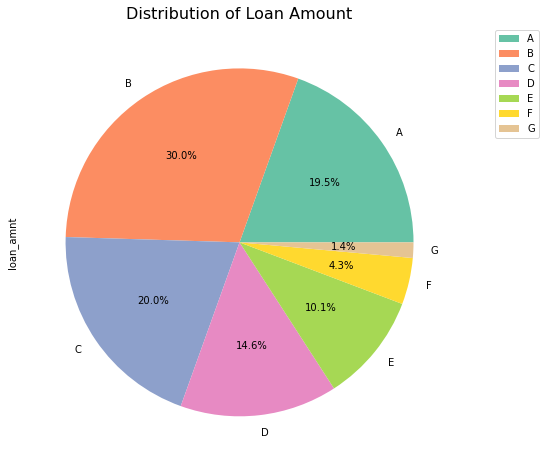

In [42]:
# extract sum of loan amount based on grade
grade_sum =  df.groupby("grade")["loan_amnt"].sum()

# Distribution using Pie plot
plt.figure(figsize=(8, 8))                             # Figure size
color = sns.set_palette('Set2')                        # Setting colour palette
plt.title("Distribution of Loan Amount", fontsize=16)  # Display title in the given font size
pie = grade_sum.plot(kind="pie", autopct='%1.1f%%')    # plot a pie plot using sum of loan amount for each grade
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1)) # Display each grades on top right
plt.show()                                             # display the plot

From the graph it can be concluded that grade B has the highest percentage and grade G has the lowest percentage of loan amount.

<a id="conclusion"> <a>
# Conclusion

* In this case study, we were given a dataset of loans with the objective of identifying variables that indicate whether a person is likely to default. Our main goal was to identify risky loan applicants in order to prevent any financial losses for the company.
* To achieve this, we performed a descriptive analysis of the dataset using Python libraries. We applied data cleaning, processing, analysis, and visualization techniques to gain insights into the dataset and provide valuable information to the company for mitigating future financial risks.
* We compared the loan status of individuals based on their grades, term duration, and verification status using graphical representations. By analyzing the graphs, we observed that the count of risky loan applicants was relatively lower compared to those who consistently paid their debts on time.
* Additionally, we discovered that individuals with grade G had the lowest credit scores and were provided with the lowest percentage of the loan amount. The graphs indicated that the number of applicants falling under grade G was relatively small, and they were more likely to default on their loans. Therefore, we recommended performing thorough verification and documentation for individuals with grade G before approving loans, as they have the potential to become risky applicants in the future.